In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "./dogscats/"

In [5]:
sz=224

In [6]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH} 

PermissionError: [Errno 13] Permission denied: '/cache'

In [7]:
!ls {PATH}

models sample test1  tmp    train  valid


In [8]:
!ls {PATH}valid

cats dogs


In [9]:
!wget http://files.fast.ai/data/dogscats.zip

--2017-12-25 23:09:42--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai... 67.205.15.147
Connecting to files.fast.ai|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  7.94MB/s    in 2m 24s  

2017-12-25 23:12:06 (5.68 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [10]:
!unzip ./data/dogcats/dogscats.zip

unzip:  cannot find or open ./data/dogcats/dogscats.zip, ./data/dogcats/dogscats.zip.zip or ./data/dogcats/dogscats.zip.ZIP.


In [11]:
files = !ls {PATH}valid/cats
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg',
 'cat.10107.jpg',
 'cat.10127.jpg',
 'cat.10131.jpg',
 'cat.10133.jpg',
 'cat.10145.jpg',
 'cat.10152.jpg',
 'cat.10154.jpg',
 'cat.10158.jpg',
 'cat.10166.jpg',
 'cat.10204.jpg',
 'cat.10221.jpg',
 'cat.10265.jpg',
 'cat.10267.jpg',
 'cat.10293.jpg',
 'cat.103.jpg',
 'cat.10304.jpg',
 'cat.1031.jpg',
 'cat.10335.jpg',
 'cat.10337.jpg',
 'cat.10349.jpg',
 'cat.10356.jpg',
 'cat.10367.jpg',
 'cat.10369.jpg',
 'cat.10383.jpg',
 'cat.10434.jpg',
 'cat.1045.jpg',
 'cat.10468.jpg',
 'cat.1047.jpg',
 'cat.10471.jpg',
 'cat.10483.jpg',
 'cat.10485.jpg',
 'cat.10531.jpg',
 'cat.10536.jpg',
 'cat.10547.jpg',
 'cat.10553.jpg',
 'cat.10562.jpg',
 'cat.10564.jpg',
 'cat.10566.jpg',
 'cat.10580.jpg',
 'cat.10588.jpg',
 'cat.10597.jpg',
 'cat.10601.jpg',
 'cat.10602.jpg',
 'cat.10636.jpg',
 'cat.10649.jpg',
 'cat.10660.jpg'

In [9]:
files = !ls {PATH}valid/cats | head
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

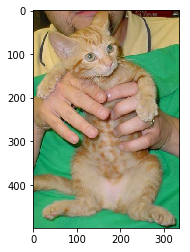

In [12]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [13]:
img.shape

(499, 336, 3)

In [14]:
img[:4, :4]

array([[[60, 58, 10],
        [60, 57, 14],
        [61, 56, 18],
        [63, 54, 23]],

       [[56, 54,  6],
        [56, 53, 10],
        [57, 52, 14],
        [60, 51, 20]],

       [[52, 49,  4],
        [52, 49,  6],
        [53, 48, 10],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [51, 45,  9],
        [53, 44, 13]]], dtype=uint8)

In [ ]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms = tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

  0%|          | 0/360 [00:00<?, ?it/s]